In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import warnings

In [ ]:
'''Main simulation function'''

@jit(nopython=True)
def Ising(L, thermalization_steps, recording_steps, beta):
  N = L * L
  #Generate a square lattice with random spins
  lattice = np.random.choice(np.array([-1,1]),size=(L,L))

  #Perform thermalization loop (without measurements)
  for step in range(thermalization_steps):
    for spin in range(N):
      decide_on_spin_flip(L, lattice, beta)

  #Perform magnetization measurements
  magnetizationSum = 0

  for step in range(recording_steps):
    magnetization = 0
    for spin in range(N):
      decide_on_spin_flip(L, lattice, beta)

      #For each spin on the lattice, add magnetization
      for row in range (L):
        for column in range (L):
          magnetization += lattice[row][column]

      #Take average over all spins
      magnetization = magnetization / N

      #Add the average to the sum over recording steps
      magnetizationSum += abs(magnetization)

  #When the recording loop is done, divide by number of steps and number of spins
  return (magnetizationSum/(recording_steps * N))

In [ ]:
'''Heat-bath algorithm'''

@jit(nopython=True)
def decide_on_spin_flip(L, lattice, beta):
  #Choose coordinates of one random spin from the square lattice
  x, y = np.random.randint(0, L), np.random.randint(0, L)

  #Sum all neighboring spins
  nearest_neighbor = lattice[(x-1)%L, y] + lattice[(x+1)%L, y] + lattice[x, (y-1)%L] + lattice[x, (y+1)%L]

  #Compute a difference of energy between the two configurations of spin
  delta = 2 * J * nearest_neighbor

  #Calculate threshold probability
  p = 1 / (1 + np.exp(-beta * delta))

  #Draw a random number representing probability
  r = np.random.random()

  #Decide on spin flip
  if r < p:
    lattice[x, y] = 1
  elif r >= p:
    lattice[x, y] = - 1

In [ ]:
'''Simulation parameters initialization'''

L = 5 #size of the lattice
T = np.array([5, 4, 3, 2, 1]) #a set of temperatures
kB = 1 #Boltzmann constant
beta = 1 / (kB * T)
J = 1 #Energy scale
thermalization_steps = 1000
recording_steps = 5000

#Prepare for magnetization measurements
magnetizationAverages = []

In [ ]:
'''Demonstration'''
for b in beta:
  magnetizationAverages += [Ising(L, thermalization_steps, recording_steps, b)]

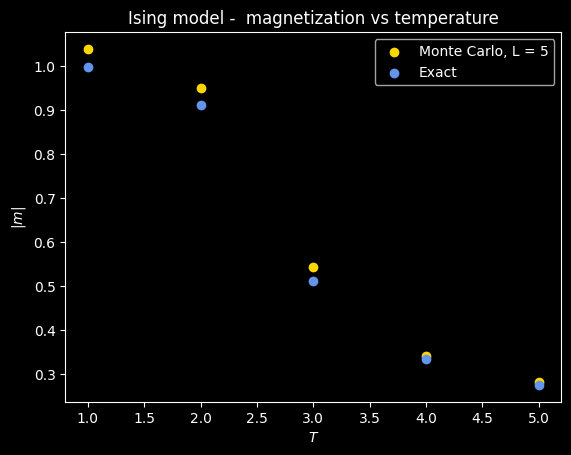

In [ ]:
'''Plotting average of absolute value of magnetization'''
plt.scatter(T, magnetizationAverages, label=f'Monte Carlo, L = {L}', color='gold', marker='o')
plt.scatter(T,  [0.275, 0.334, 0.512, 0.912, 0.998], label='Exact', color='cornflowerblue', marker='o')

plt.style.use('dark_background')
plt.title(f'Ising model -  magnetization vs temperature')
plt.xlabel(r'$T$')
plt.ylabel(r'$|m|$')
plt.legend()
plt.show()

In [ ]:
'''Simulation parameters initialization'''
L1, L2 = 10, 20 #sizes of the lattices
T = np.arange(1,5, 0.0625)#a set of temperatures
kB = 1 #Boltzmann constant
beta = 1 / (kB * T)
J = 1 #Energy scale
thermalization_steps = 2000
recording_steps = 5000

#Prepare for magnetization measurements
magnetizationAverages10, magnetizationAverages20 = [], []

for b in beta:
  magnetizationAverages10 += [Ising(L1, thermalization_steps, recording_steps, b)]
  magnetizationAverages20 += [Ising(L2, thermalization_steps, recording_steps, b)]

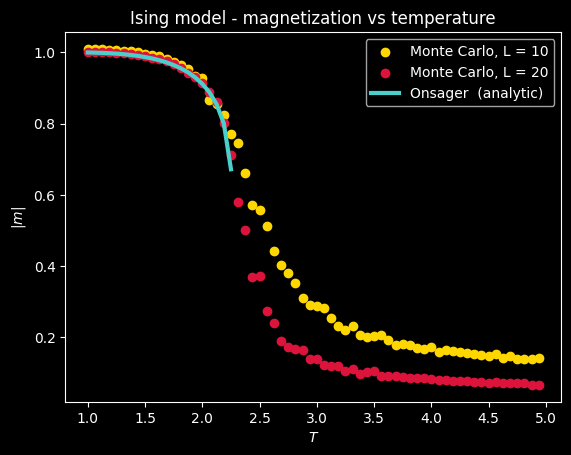

In [ ]:
'''Plotting average of absolute value of magnetization along with the analytic solution'''
plt.scatter(T, magnetizationAverages10, label=f'Monte Carlo, L = {L1}', color='gold', marker='o')
plt.scatter(T, magnetizationAverages20, label=f'Monte Carlo, L = {L2}', color='crimson', marker='o')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # Calculate Onsager solution
    Onsager = (1 - (1 / (np.sinh(2 * J / T)) ** 4)) ** (1 / 8)

plt.plot(T, Onsager, color='mediumturquoise', label='Onsager  (analytic)', linewidth=3)

plt.style.use('dark_background')
plt.title(f'Ising model - magnetization vs temperature')
plt.xlabel(r'$T$')
plt.ylabel(r'$|m|$')
plt.legend()
plt.show()

In [ ]:
'''Additional function for calculating susceptibility'''
def IsingSlow(L, thermalization_steps, recording_steps, beta):
  N = L * L
  #Generate a square lattice with random spins
  lattice = np.random.choice(np.array([-1,1]),size=(L,L))

  #Perform thermalization loop (without measurements)
  for step in range(thermalization_steps):
    for spin in range(N):
      decide_on_spin_flip(L, lattice, beta)

  #Perform magnetization measurements
  magnetizationSum = []

  for step in range(recording_steps):
    magnetization = 0
    for spin in range(N):
      decide_on_spin_flip(L, lattice, beta)

      #For each spin on the lattice, add magnetization
      for row in range (L):
        for column in range (L):
          magnetization += lattice[row][column]

      #Take average over all spins
      magnetization = magnetization / N

      #Add the average to the sum over recording steps
      magnetizationSum += [abs(magnetization)]

  #When the recording loop is done, return susceptibility
  return np.var(magnetizationSum) * beta * L**2

In [ ]:
'''Simulation parameters initialization'''
L1, L2 = 10, 20 #sizes of the lattices
N = L * L #number of spins
T = np.arange(1,5, 0.25)#a set of temperatures
kB = 1 #Boltzmann constant
beta = 1 / (kB * T)
J = 1 #Energy scale
thermalization_steps = 2000
recording_steps = 5000

#Prepare for susceptibility measurements
susceptibility10, susceptibility20 = [], []

'''Demonstration'''
for b in beta:
  susceptibility10 += [IsingSlow(L1, thermalization_steps, recording_steps, b)]
  susceptibility20 += [IsingSlow(L2, thermalization_steps, recording_steps, b)]

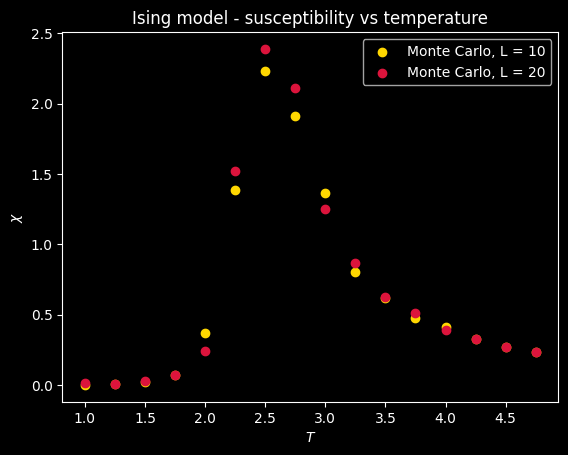

In [ ]:
'''Plotting susceptibility'''
plt.style.use('dark_background')
plt.scatter(T, susceptibility10, label=f'Monte Carlo, L = {L1}', color='gold', marker='o')
plt.scatter(T, susceptibility20, label=f'Monte Carlo, L = {L2}', color='crimson', marker='o')
plt.title(f'Ising model - susceptibility vs temperature')
plt.xlabel(r'$T$')
plt.ylabel(r'$\chi$')
plt.legend()
plt.show()